# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Importing libraries</a></div><div class="lev2 toc-item"><a href="#Colors-and-markers" data-toc-modified-id="Colors-and-markers-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Colors and markers</a></div><div class="lev1 toc-item"><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></div>

---
## Importing libraries

In [1]:
%load_ext watermark
%watermark -v -m -a "Lilian Besson" -p numpy,h5py,matplotlib,ipywidgets,seaborn

Lilian Besson 

CPython 3.6.8
IPython 7.4.0

numpy 1.16.3
h5py 2.9.0
matplotlib 3.0.3
ipywidgets 7.4.2
seaborn 0.9.0

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.15.0-51-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import glob
import numpy as np
import h5py

In [3]:
%matplotlib notebook
from ipywidgets import interact, interactive

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.2)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 6)

 ## Colors and markers
 We can generate a color map for these $N=16$ algorithms, and a (cycling) set of markers.

In [45]:
repetitions = [1, 10, 100, 1000]

repetitions = [1000]

In [46]:
nRepetitions = len(repetitions)

In [47]:
palette = sns.hls_palette(nRepetitions + 1)[:nRepetitions]

In [48]:
allmarkers = ['o', 'D', 'v', 'p', '<', 's', '^', '*', 'h', '>']
longlist = allmarkers * (1 + int(nRepetitions / float(len(allmarkers))))  # Cycle the good number of time
markers = longlist[:nRepetitions]  # Truncate

In [49]:
alllinestyles = ['-', '--', '-.', ':']
longlist = alllinestyles * (1 + int(nRepetitions / float(len(alllinestyles))))  # Cycle the good number of time
linestyles = longlist[:nRepetitions]  # Truncate

# Data

In [50]:
njobs = [
    [1, 2, 3, 4, 6, 8, 12, 24, 48, 100],
    [1, 2, 3, 4, 6, 8, 12, 24, 48, 100],
    [1, 2, 3, 4, 6, 8, 12, 24, 48, 100],
    np.arange(1, 101)
]

In [51]:
njobs

[[1, 2, 3, 4, 6, 8, 12, 24, 48, 100],
 [1, 2, 3, 4, 6, 8, 12, 24, 48, 100],
 [1, 2, 3, 4, 6, 8, 12, 24, 48, 100],
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100])]

In [52]:
data = [
    np.array([1.785, 4.140, 5.227, 5.972, 7.872, 8.844, 8.916, 9.455, 10.623, 12.659]),
    np.array([3.273, 4.560, 4.057, 3.754, 3.724, 4.119, 5.379, 7.596, 12.557, 18.135]),
    np.array([20.001, 13.041, 10.524, 8.872, 7.801, 7.849, 8.103, 10.774, 15.563, 26.797]),
    #np.array([173.370, 99.570, 71.492, 55.510, 42.629, 42.028, 40.836, 43.940, 49.927, 59.767]),
    np.array([176.553, 101.038, 69.475, 56.505, 47.111, 42.159, 42.240, 40.798, 41.920, 41.326, 40.207, 40.132, 39.934, 41.518, 41.837, 40.504, 40.604, 41.352, 41.868, 42.405, 42.598, 42.805, 43.033, 42.657, 42.486, 42.832, 43.109, 43.350, 43.436, 44.523, 47.708, 46.708, 47.534, 48.067, 48.869, 49.695, 49.542, 50.262, 50.171, 49.783, 51.024, 50.221, 49.393, 50.288, 50.967, 49.158, 49.486, 52.096, 51.356, 49.548, 49.101, 49.319, 49.505, 49.831, 49.888, 50.257, 50.918, 52.569, 52.122, 52.376, 52.277, 54.655, 57.224, 57.250, 57.934, 57.925, 57.097, 57.961, 57.457, 56.918, 58.197, 57.209, 53.535, 54.033, 54.071, 55.480, 56.340, 56.389, 55.769, 55.588, 55.697, 58.477, 62.513, 60.066, 61.218, 57.333, 59.373, 59.186, 60.227, 60.432, 60.955, 59.376, 60.275, 58.967, 59.364, 61.578, 60.922, 61.597, 62.696, 62.486]),
]

In [53]:
#data = np.array([[176.553, 101.038, 69.475, 56.505, 47.111, 42.159, 42.240, 40.798, 41.920, 41.326, 40.207, 40.132, 39.934, 41.518, 41.837, 40.504, 40.604, 41.352, 41.868, 42.405, 42.598, 42.805, 43.033, 42.657, 42.486, 42.832, 43.109, 43.350, 43.436, 44.523, 47.708, 46.708, 47.534, 48.067, 48.869, 49.695, 49.542, 50.262, 50.171, 49.783, 51.024, 50.221, 49.393, 50.288, 50.967, 49.158, 49.486, 52.096, 51.356, 49.548, 49.101, 49.319, 49.505, 49.831, 49.888, 50.257, 50.918, 52.569, 52.122, 52.376, 52.277, 54.655, 57.224, 57.250, 57.934, 57.925, 57.097, 57.961, 57.457, 56.918, 58.197, 57.209, 53.535, 54.033, 54.071, 55.480, 56.340, 56.389, 55.769, 55.588, 55.697, 58.477, 62.513, 60.066, 61.218, 57.333, 59.373, 59.186, 60.227, 60.432, 60.955, 59.376, 60.275, 58.967, 59.364, 61.578, 60.922, 61.597, 62.696, 62.486]])

In [54]:
def plotData(normalize=True):
    plt.figure()
    plt.title("Effect of the number of jobs on computation time")
    plt.xlabel("Number of jobs N_JOBS")
    if normalize:
        plt.ylabel("Relative computation time wrt N_JOBS=1")
    else:
        plt.ylabel("Computation time (in seconds)")
    for i, N in enumerate(repetitions):
        x = njobs[i]
        y = data[i]
        if normalize:
            y = y[0] / y  # normalize?
        plt.plot(x, y, color=palette[i], marker=markers[i], linestyle=linestyles[i], label=f"$N={N}$")
    plt.legend()
    plt.show()

    plt.savefig(f"analyze_speedup_as_nb_of_jobs{'_normalize' if normalize else ''}.pdf")
    plt.savefig(f"analyze_speedup_as_nb_of_jobs{'_normalize' if normalize else ''}.png")


<IPython.core.display.Javascript object>


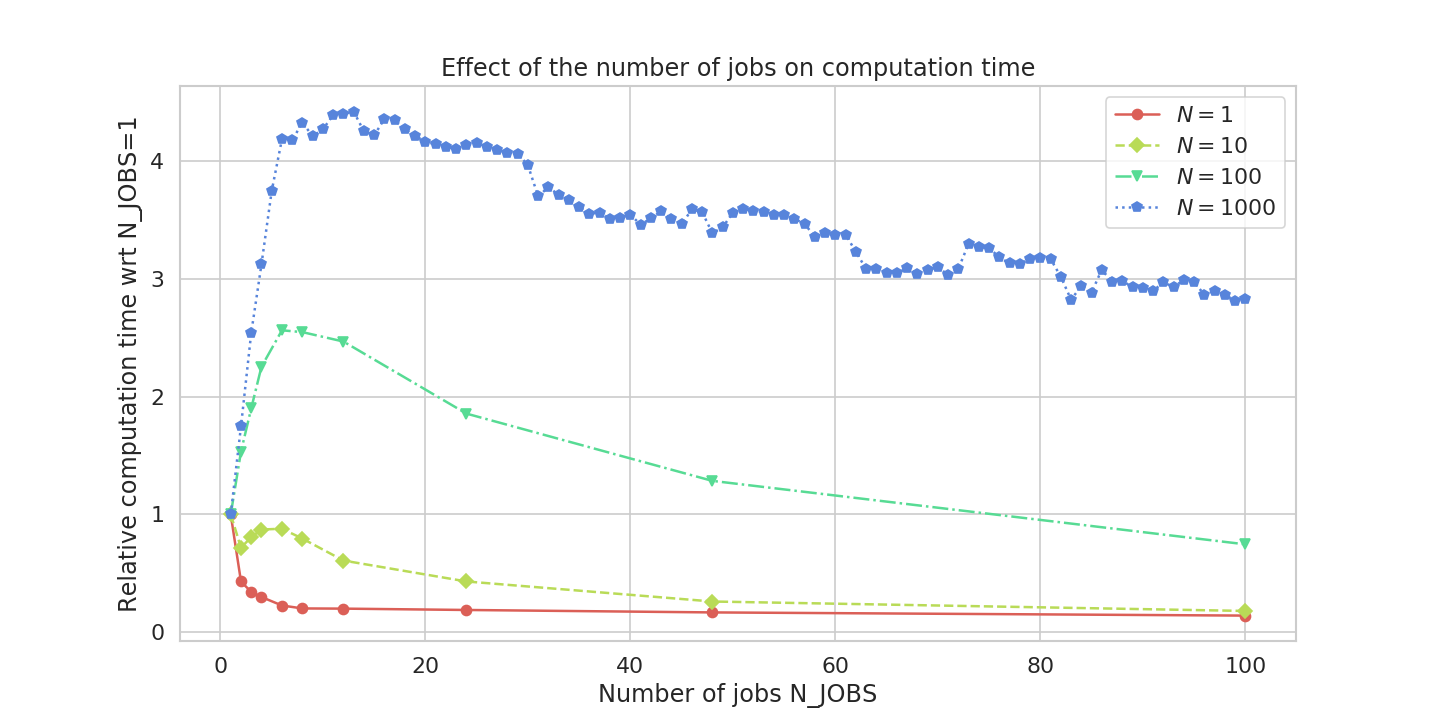

In [55]:
plotData(normalize=True)

In [39]:
!ls -larth

total 1,4M
-rw-r--r-- 1 lilian lilian  1,3K mai    3 12:08   extract_data_from_logs.sh
-rw-r--r-- 1 lilian lilian   429 mai    3 14:53   extract_data_from_hdf5.py
-rwxr-xr-x 1 lilian lilian  1,9K mai   10 22:48   launch_simulations.sh
drwxr-xr-x 6 lilian lilian  4,0K juin   7 15:14   ..
-rw-r--r-- 1 lilian lilian 1000K juin  14 18:31   Analyze_data.ipynb
drwxr-xr-x 2 lilian lilian  4,0K juin  19 16:16   .ipynb_checkpoints
-rw-r--r-- 1 lilian lilian   19K juin  19 16:22   analyze_speedup_as_nb_of_jobs.pdf
-rw-r--r-- 1 lilian lilian   64K juin  19 16:22   analyze_speedup_as_nb_of_jobs.png
-rw-r--r-- 1 lilian lilian   19K juin  19 17:42   analyze_speedup_as_nb_of_jobs_normalize.pdf
-rw-r--r-- 1 lilian lilian   53K juin  19 17:42   analyze_speedup_as_nb_of_jobs_normalize.png
-rw-r--r-- 1 lilian lilian  4,7K juin  19 17:42   data_190619.txt
-rw-r--r-- 1 lilian lilian  135K juin  19 17:42   Analyze_logs_data_speedup_factor.ipynb
drwxr-xr-x 3 lilian lilian   12K juin  19 17:42   

In [56]:
pwd

'/home/lilian/ownCloud/owncloud.crans.org/Crans/These_2016-17/reports/phd-thesis.git/2-Chapters/3-Chapter/logs'